In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns

import tensorflow as tf
from tensorflow import keras

In [2]:
# READ FROM CSV AND CREATE A DATA FRAME

import pandas as pd

df = pd.read_csv('../datasets/diabetes.csv')
df

# df_male = df.loc[df['gender'] == 'Male']    # GET ONLY THE MALE DATA(REASON: APATOTO FEMALE DATA THAK)

# df = df.drop("gender",axis="columns")     # REMOVE GENDER COLUMN

# df['gender'].replace('Male', 1, inplace=True)
# df['gender'].replace('Female', 0, inplace=True)
# df = df.loc[df['gender'] != 'Other']

# df = df.drop("smoking_history",axis="columns")     # REMOVE SMOKING HISTORY COLUMN(REASON: DONT KNOW HOW SMOKING AFFECTS DIABETES)
# df_male

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']
for i in col:
  df[i].replace(0,df[i].mean(),inplace=True)



In [4]:
# SPLIT DF_MALE INTO X & Y
# X = INDEPENDENT VARIABLES
# Y = EPENDENT VARIABLES
y = df['Outcome'].copy()
X = df.drop('Outcome', axis="columns")

y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
# HANDLE ADTA IMBALANCE - INCREASE/DECREASE ROWS WITH CLASS VALUES(0/1) IF ONE IS LOWER IN NUMBER
# FOR BETTER TRAINING

# from imblearn.over_sampling import SMOTE

# X_balanced, y_balanced = SMOTE().fit_resample(X, y)
# y_balanced.value_counts()

In [6]:
# TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Scale X with a standard scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [7]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(32, input_shape=(8,), activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary(
    expand_nested=True,
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


In [9]:
earlystop_loss = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=10,
    # callbacks=[earlystop_loss],
)

Epoch 1/50
50/50 [==============================] - 1s 6ms/step - loss: 0.6092 - accuracy: 0.6823 - val_loss: 0.5181 - val_accuracy: 0.7317
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7699 - val_loss: 0.4714 - val_accuracy: 0.7724
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.7699 - val_loss: 0.4603 - val_accuracy: 0.7398
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.7923 - val_loss: 0.4594 - val_accuracy: 0.7480
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.7943 - val_loss: 0.4627 - val_accuracy: 0.7480
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.7902 - val_loss: 0.5034 - val_accuracy: 0.7642
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8086 - val_loss: 0.4620 - val_accuracy: 0.7561
Epoch 8/50
50/50 [==

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))
print(loss)

5/5 [==============================] - 0s 1ms/step - loss: 1.3903 - accuracy: 0.6688
Accuracy: 66.88
1.3902790546417236


Epochs run: 50
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


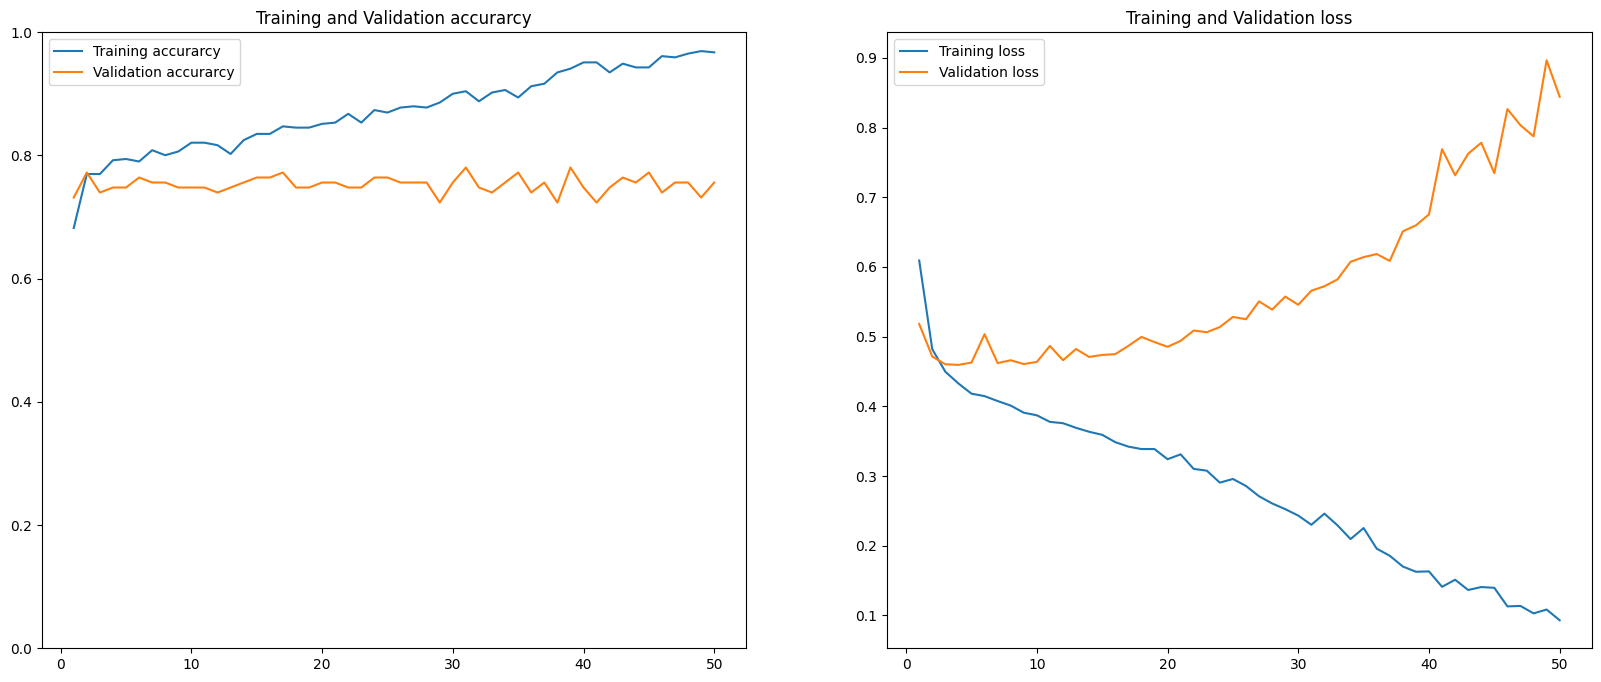

In [11]:
from matplotlib import pyplot as plt

print("Epochs run:", len(history.history["loss"]))

print(history.history.keys())
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.ylim((0, 1))
plt.plot(epochs, acc, label="Training accurarcy")
plt.plot(epochs, val_acc, label="Validation accurarcy")
plt.title("Training and Validation accurarcy")
plt.legend()

# Train and validation loss
plt.subplot(1, 2, 2)

plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

In [12]:
# HYPER PARAMETER TUNING

# from sklearn.model_selection import GridSearchCV
  
# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']} 
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# # fitting the model for grid search
# grid.fit(X_train, y_train)

# # print best parameter after tuning
# print(grid.best_params_)
  
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

In [13]:
# PREDICT RESULTS

# make probability predictions with the model
y_pred = model.predict(X_test)
# round predictions 
y_pred_rounded = [round(x[0]) for x in y_pred]

5/5 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

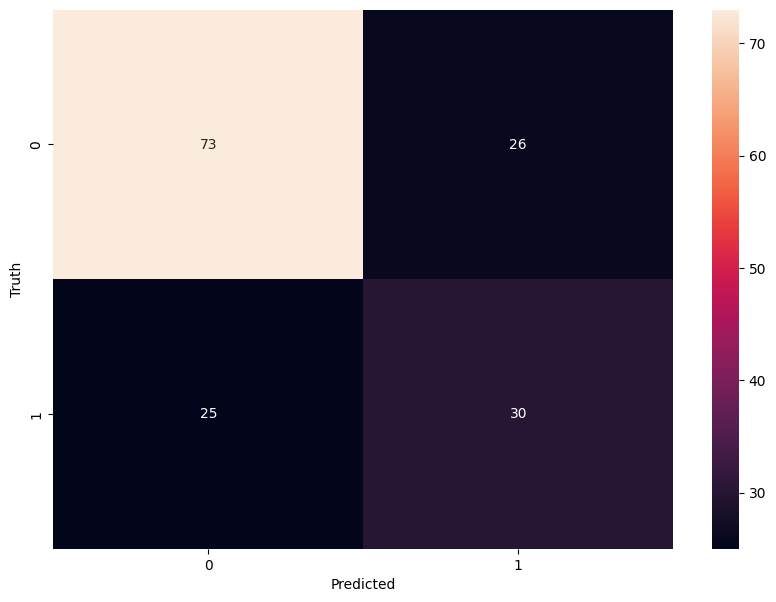

In [14]:
# CONFUSION MATRIX

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred_rounded)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [15]:
# MANUAL CHECKING BY PUTTING ROW VALUES

row = 800
y_pred = model.predict(X_test.iloc[[row]])
res = y_pred[0]
print('prediction => ', res)
print('real => ', y_test.iloc[[row]])

IndexError: positional indexers are out-of-bounds

In [ ]:
# SAVING THE MODEL USING PICKLE PACKAGE

import pickle

# save the iris classification model as a pickle file
model_pkl_file = "diabetes-model-ann.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://6b71e845-940e-40e7-9626-17c78c505ffe/assets


In [ ]:
# # LOAD AND USE THE SAVED MODEL USING PICKLE PACKAGE
# with open(model_pkl_file, 'rb') as file:  
#     model = pickle.load(file)

# # evaluate model 
# y_predict = model.predict(X_test)

# # check results
# pred = model.evaluate(X_test, y_test)
# print(f"Accuracy : {pred * 100}%")